![image.png](attachment:image.png)

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
data_frame = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')

In [103]:
variaveis = ['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration']

base = data_frame[variaveis]

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [104]:
# verificando se há missings

base.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

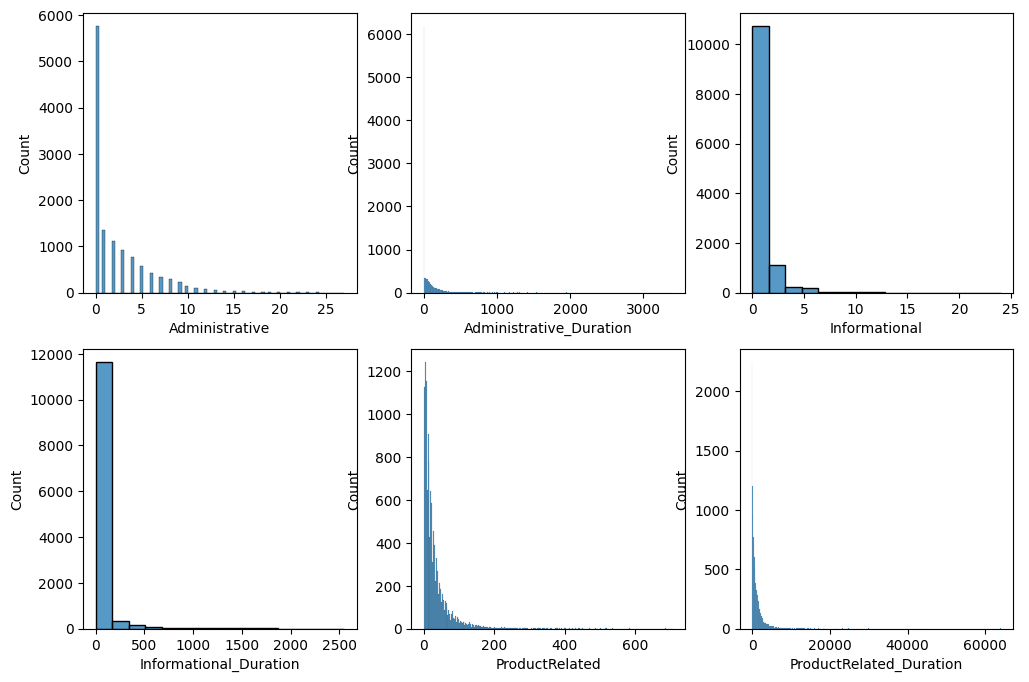

In [105]:
# verificando a distribuição das variáveis

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

i, j = 0, 0

for col in base.columns:

  if j < 3:
    sns.histplot(base[col], ax=axes[i][j])
    j = j + 1

  if j == 3:
    j = 0
    i = i + 1

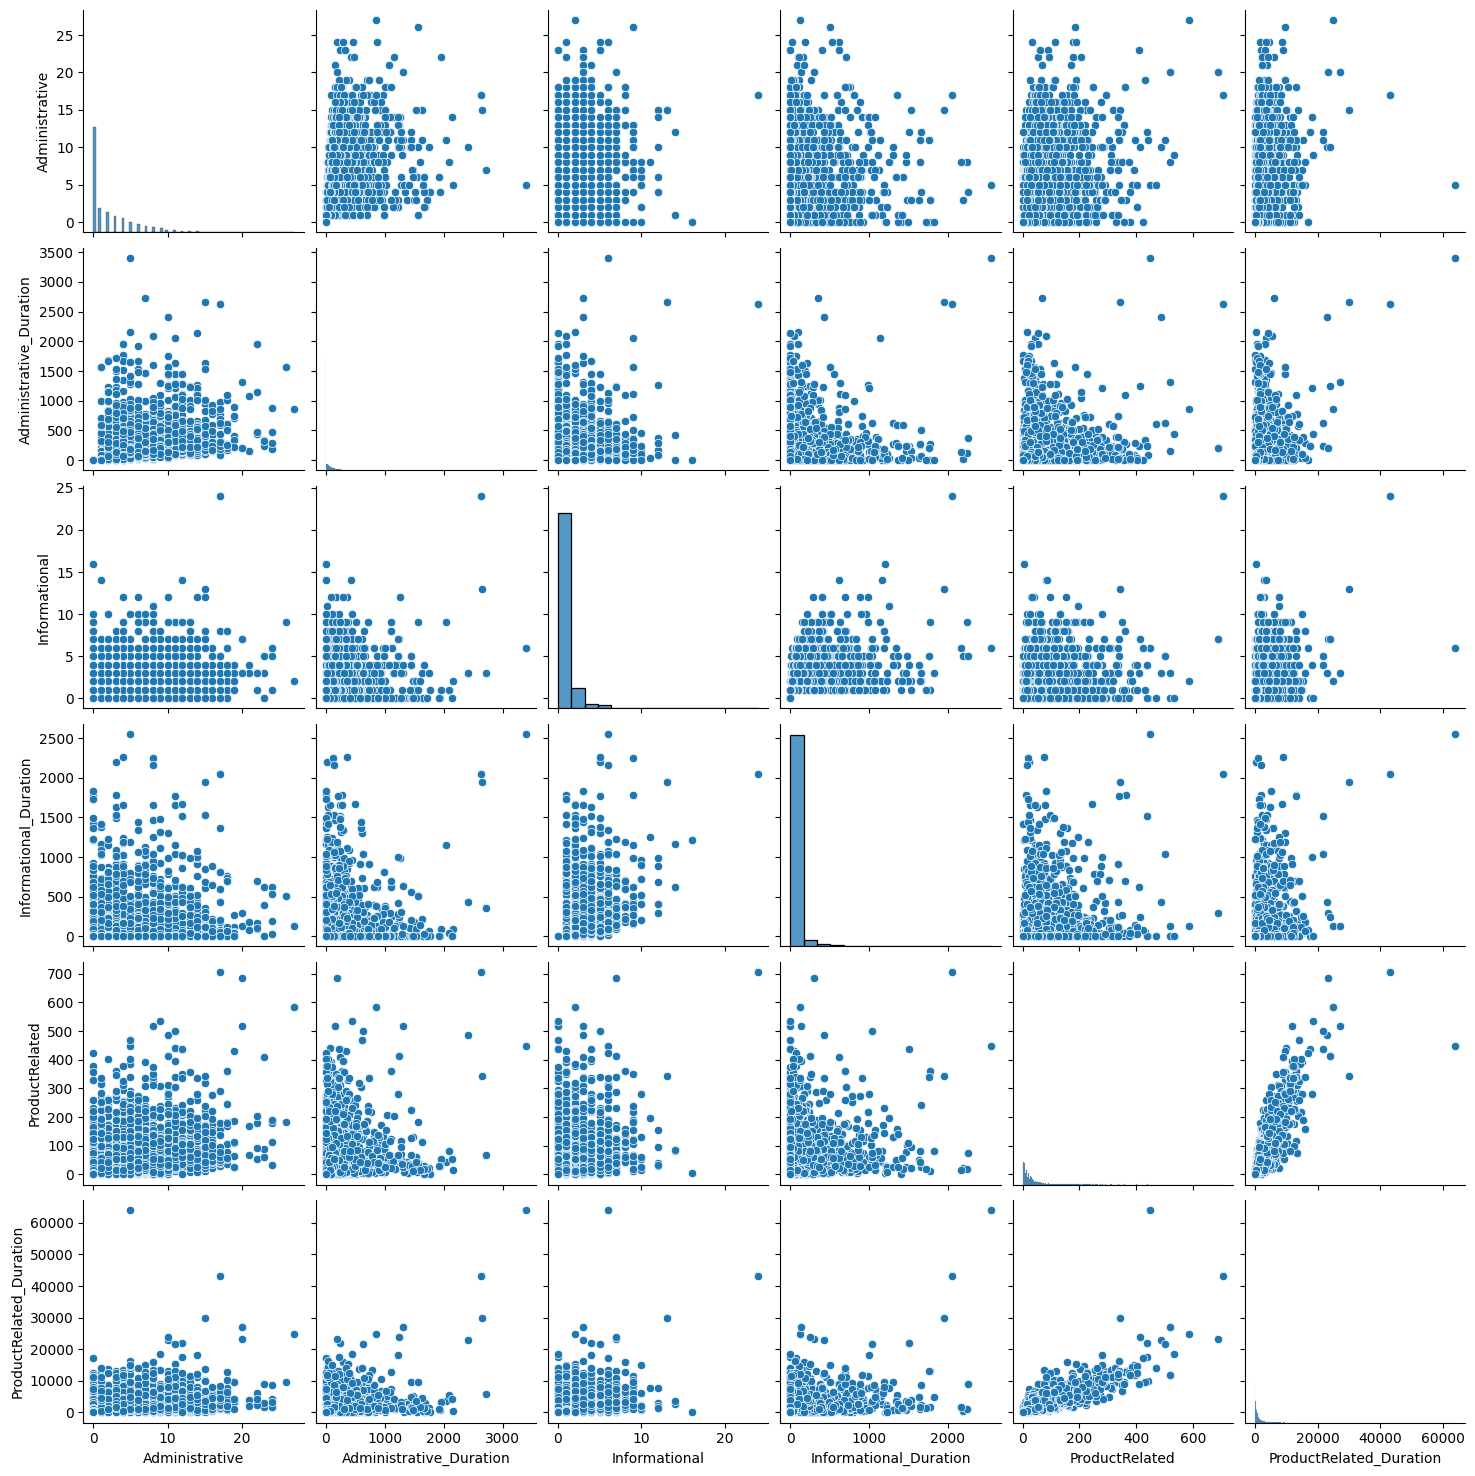

In [106]:
# verificando a distribuição das variáveis

sns.pairplot(base)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [107]:
# padronização dos dados

base_pad = pd.DataFrame(StandardScaler().fit_transform(base), columns = base.columns)

base_pad['Revenue'] = data_frame['Revenue'].astype('category')


### Método de cotovelo

In [108]:
SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(base_pad[variaveis])
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

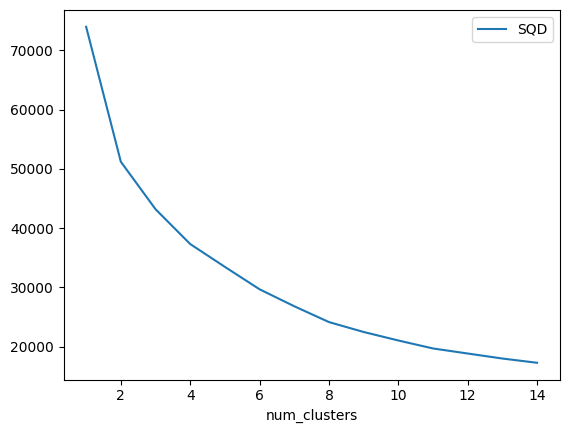

In [109]:
df = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df.plot(x = 'num_clusters', y = 'SQD');

### Coeficiente de Silueta

In [110]:
# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(base_pad[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(base_pad[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    base_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

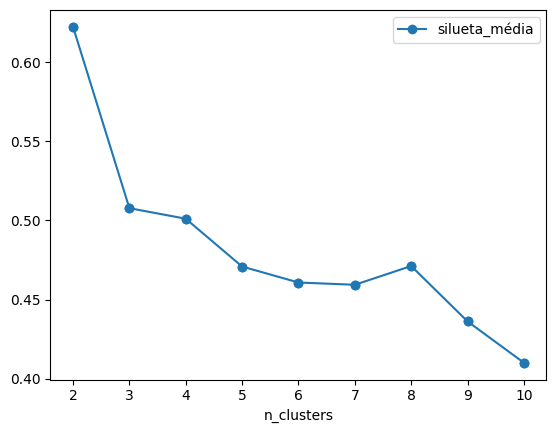

In [111]:

df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

### Avaliação para 2 grupos

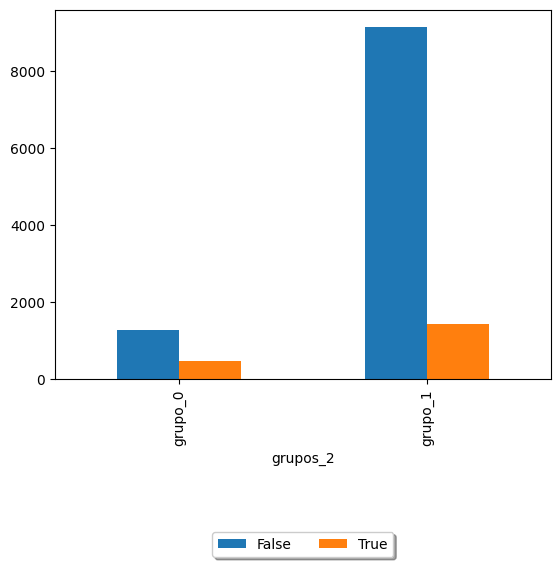

In [112]:
ax = base_pad.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

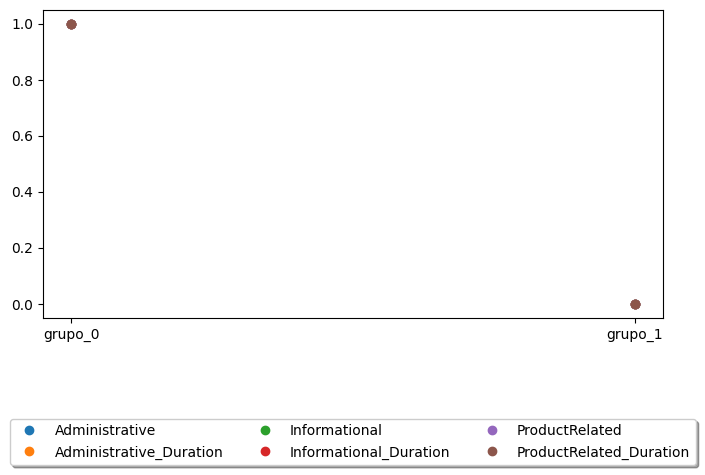

In [113]:
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(base_pad.groupby(['grupos_2'])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)

In [114]:
pd.crosstab(base_pad['Revenue'], base_pad['grupos_2'])

grupos_2,grupo_0,grupo_1
Revenue,,
False,1273,9149
True,479,1429


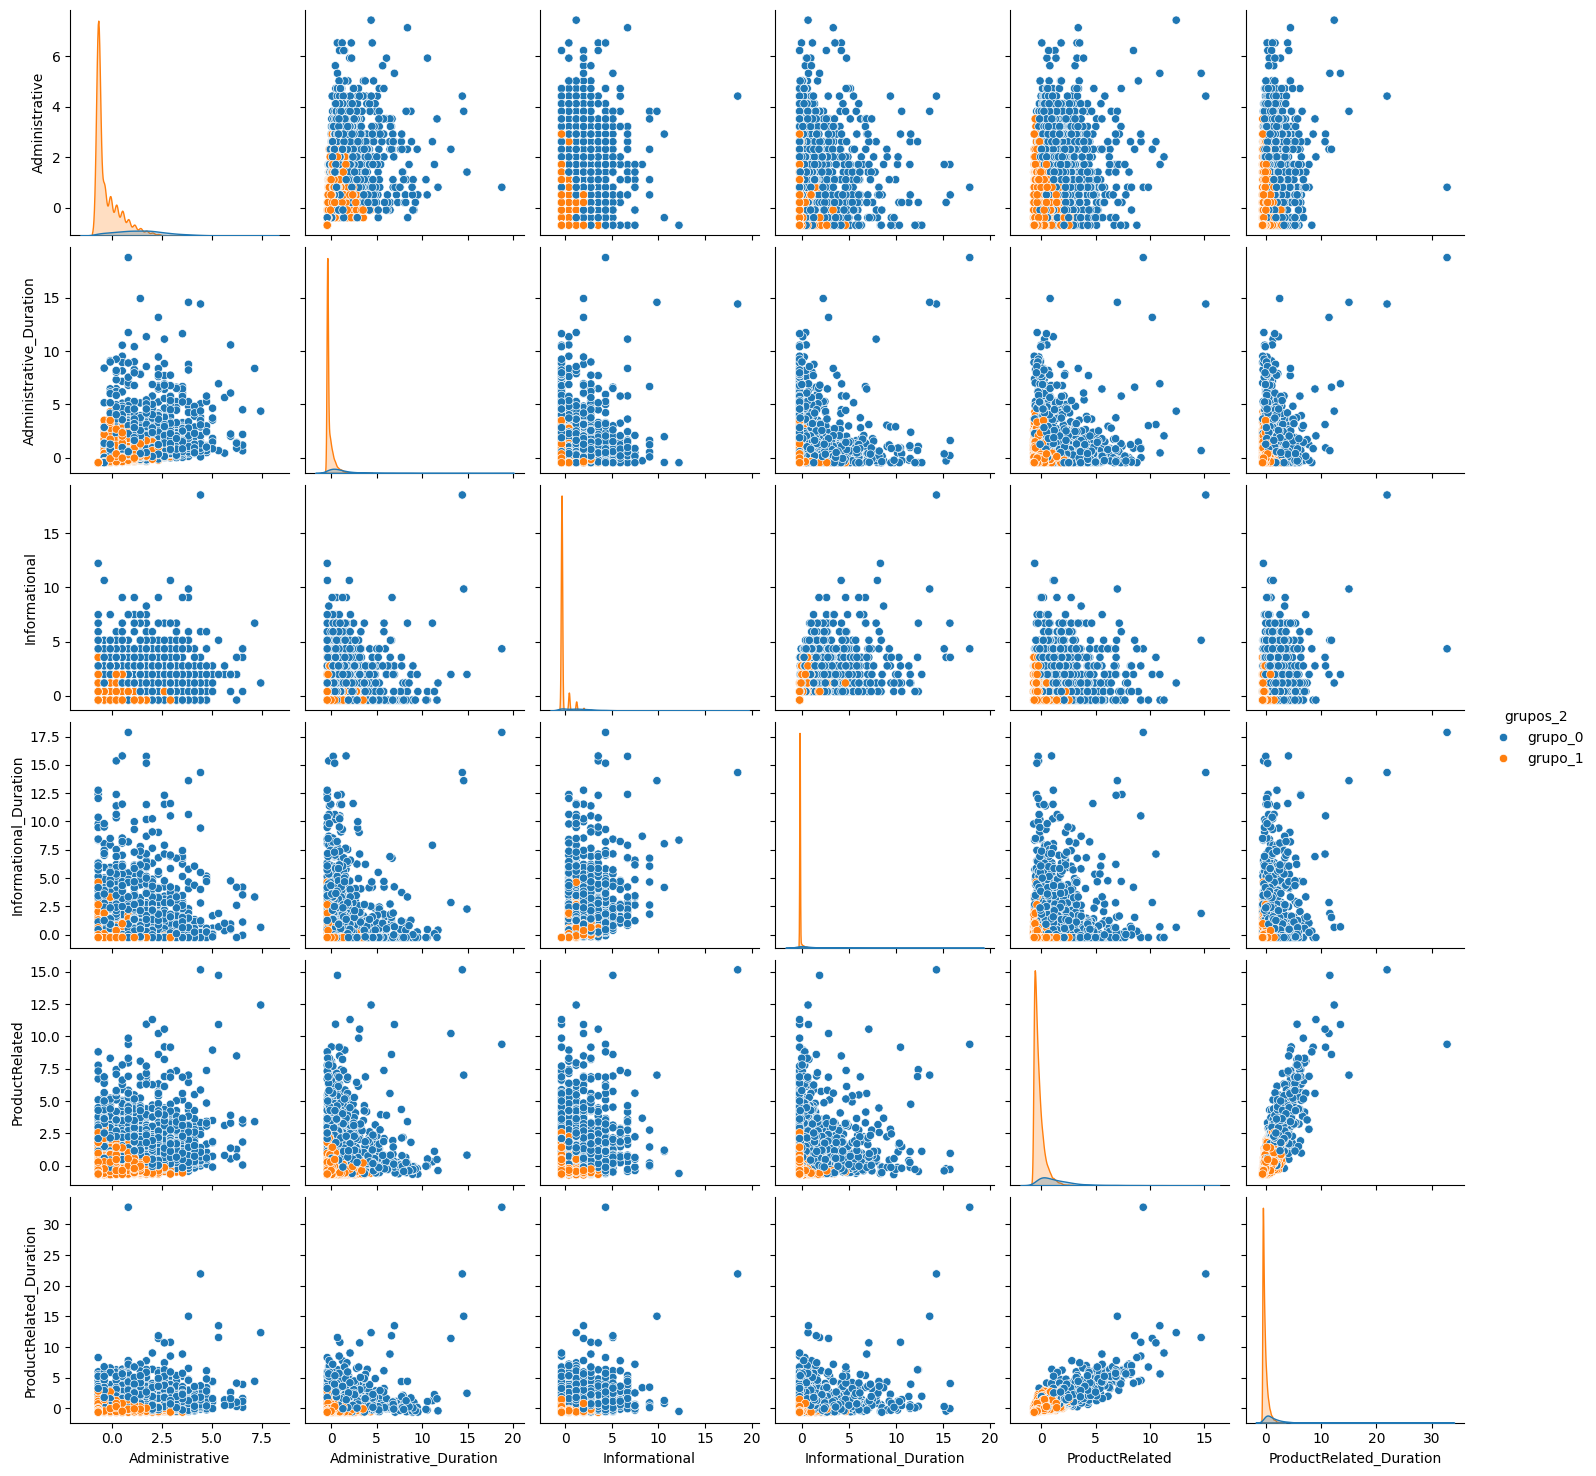

In [115]:
n_clusters = 2
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(base_pad[variaveis + [var_grupo]], hue=var_grupo)

In [116]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(base_pad[variaveis])

In [117]:
def biplot(score,coeff, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2/(xs.max() - xs.min())
    scaley = 2/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(7, 7))
#     scatter = ax.scatter(xs * scalex,ys * scaley, c = y)
    sns.kdeplot(x = xs * scalex, y = ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='viridis')
#     ax.legend(*scatter.legend_elements())

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[1]))
    ax.grid()


#Call the function. Use only the 2 PCs.

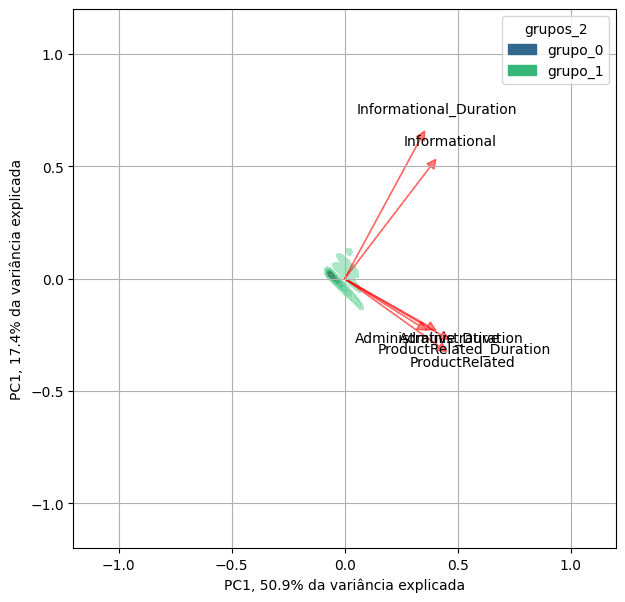

In [118]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]),
       base_pad['grupos_2'],
       labels = variaveis)
plt.show()

### Avaliação para 3 grupos

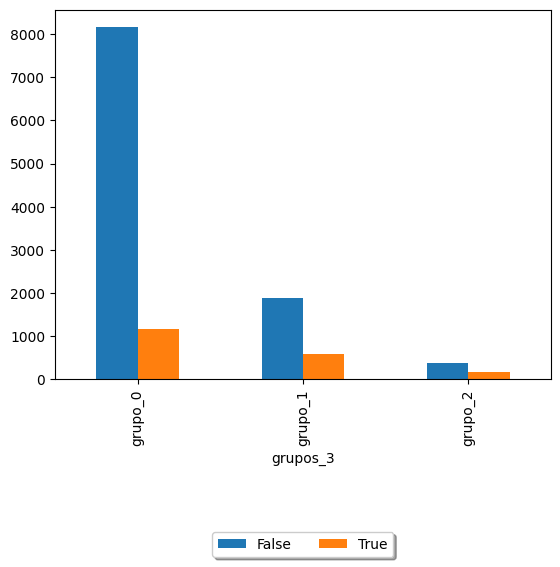

In [119]:
ax = base_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

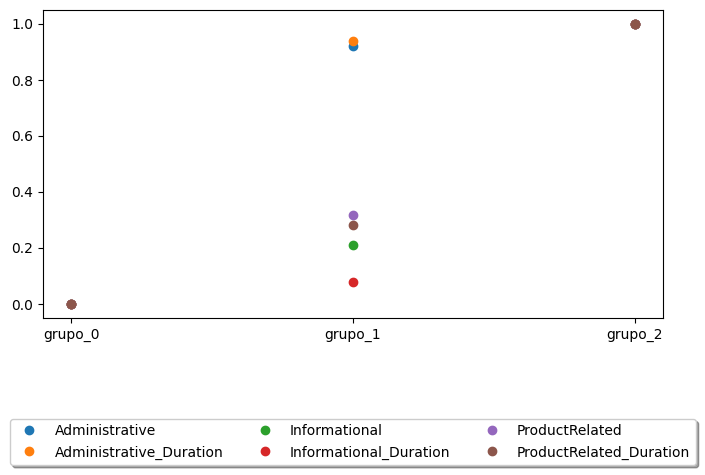

In [120]:
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(base_pad.groupby(['grupos_3'])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)

In [121]:
pd.crosstab(base_pad['Revenue'], base_pad['grupos_3'])

grupos_3,grupo_0,grupo_1,grupo_2
Revenue,,,
False,8163,1877,382
True,1168,572,168


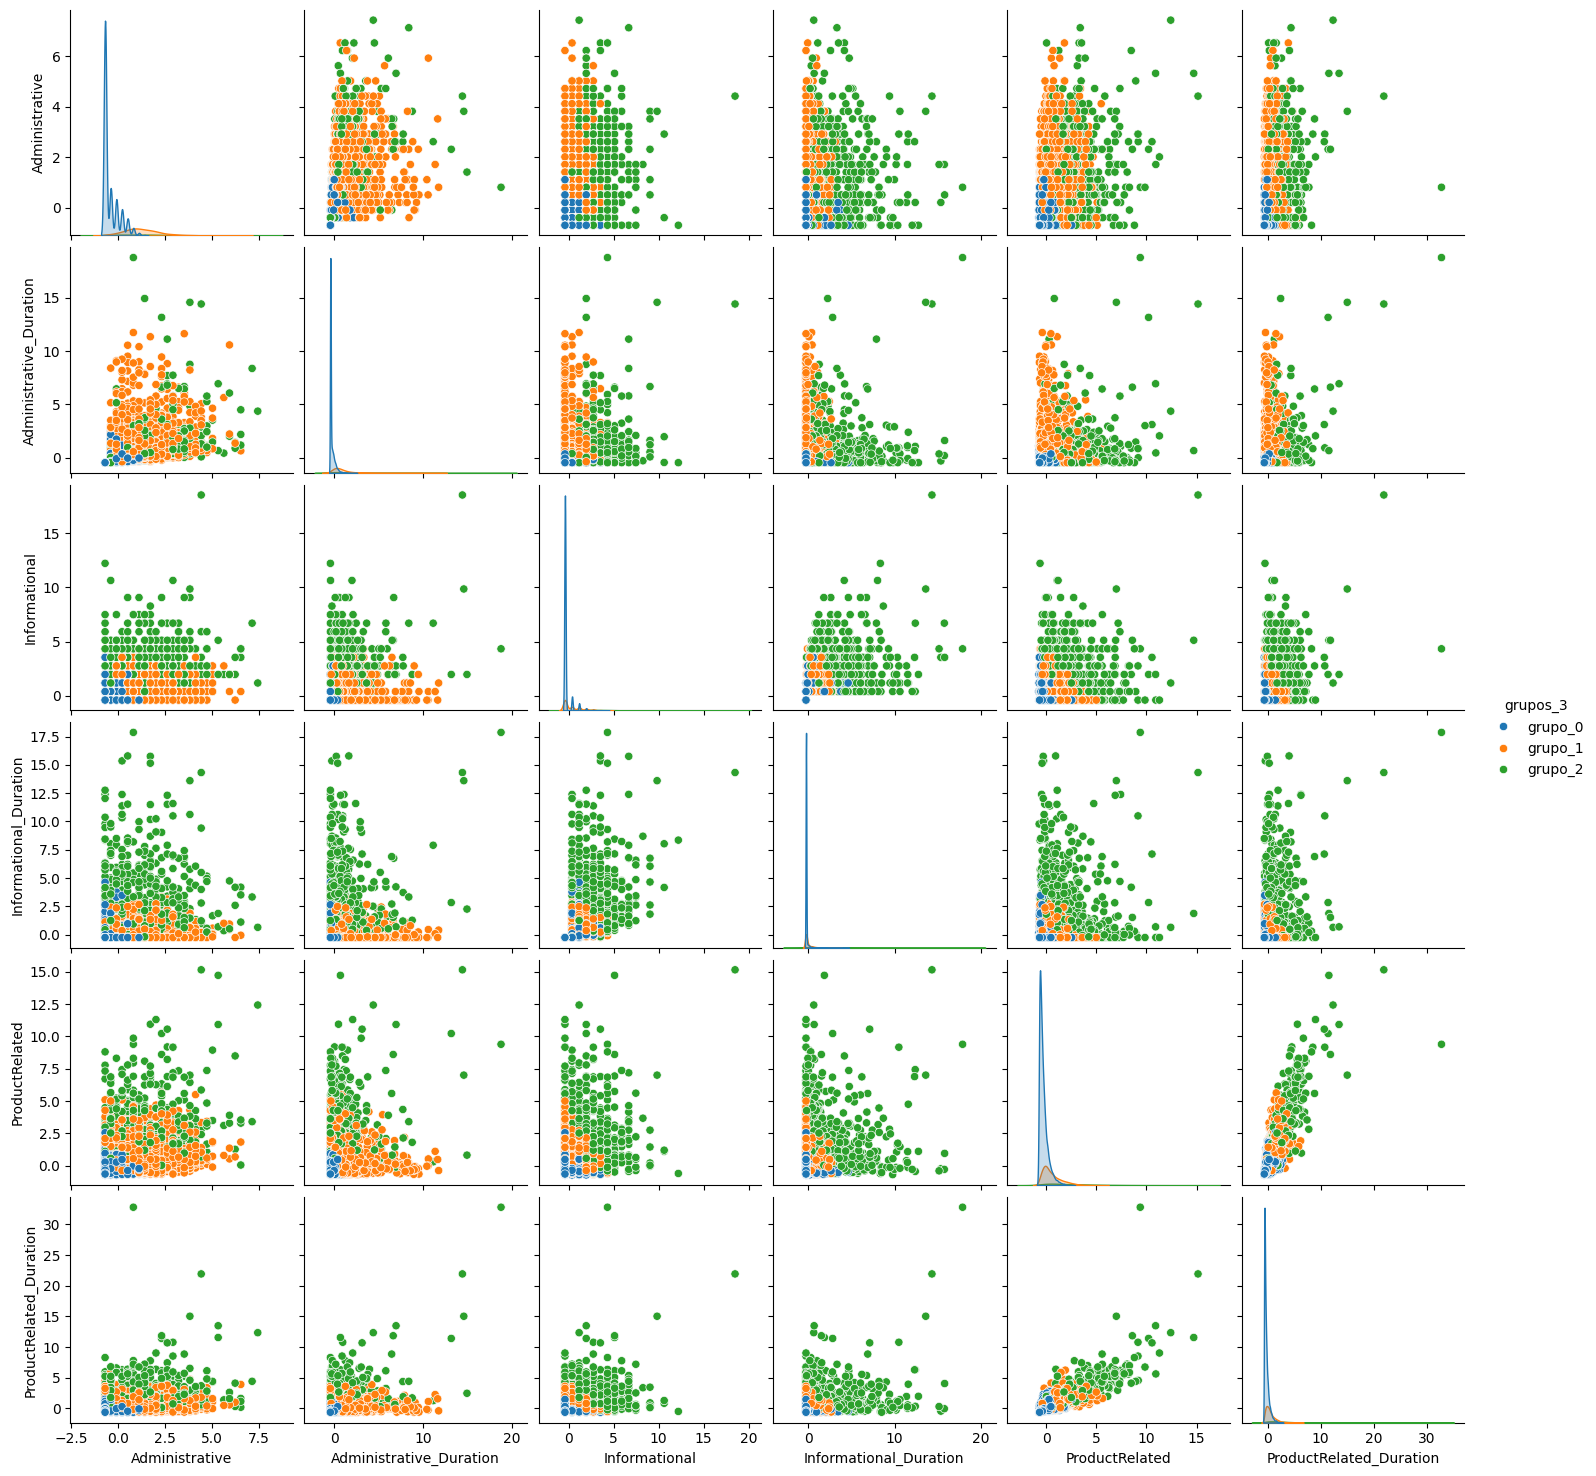

In [122]:
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(base_pad[variaveis + [var_grupo]], hue=var_grupo)

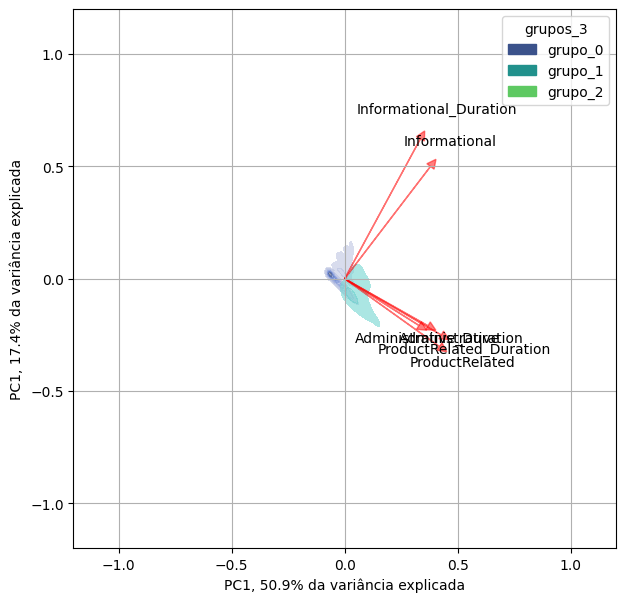

In [123]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]),
       base_pad['grupos_3'],
       labels = variaveis)
plt.show()

*O agrupamento por 2 grupos demonstra-se mais efetivo e interessante aos propósitos do negócio, em que o delineamento de perfis de clientes que apresentam, ou não, maior propensão a realizar compras no site pode ser muito útil nas tomadas de decisão da empresa*

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

<Axes: xlabel='grupos_2', ylabel='Count'>

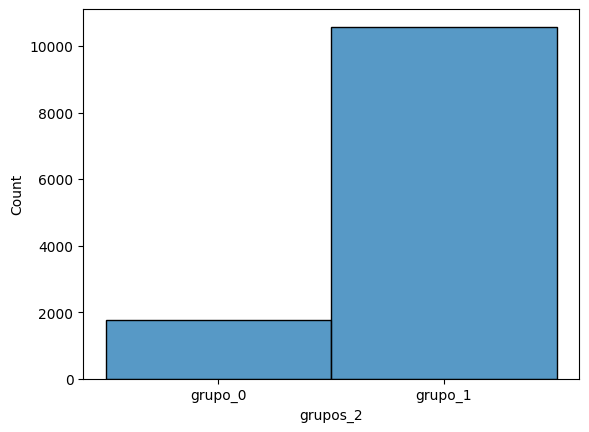

In [124]:
# avaliando a proporção dos grupos constituídos na base de dados

sns.histplot(x='grupos_2', data=base_pad)

<Axes: xlabel='BounceRates', ylabel='Count'>

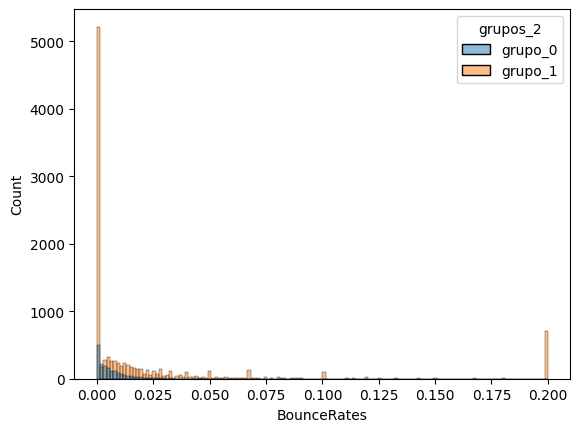

In [127]:
# avaliando relação entre os grupos e a variável BounceRates

base_pad['BounceRates'] = data_frame['BounceRates']

sns.histplot(x='BounceRates', hue='grupos_2', data=base_pad)

<Axes: xlabel='Revenue', ylabel='count'>

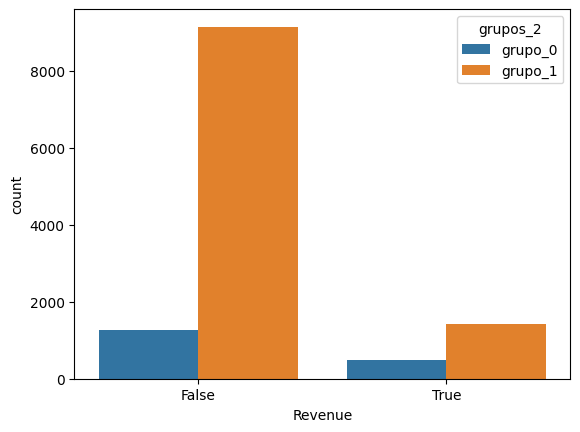

In [128]:
# avaliando relação entre os grupos e a variável Revenue

sns.countplot(x='Revenue', hue='grupos_2', data=base_pad)

In [129]:
# avaliando relação entre os grupos e a variável Revenue

pd.crosstab(base_pad['Revenue'], base_pad['grupos_2'])

grupos_2,grupo_0,grupo_1
Revenue,,
False,1273,9149
True,479,1429


*Apesar de, em valores brutos, os clientes do grupo_1 compram mais que os do grupo_0, estes mostram ser mais propensos a comprar no site. Enquanto somente 15,61% dos clientes do grupo_1 acabam comprando após visitarem o site, essa taxa sobe para 37,68% quando se observa o comportamento dos clientes do grupo_0*